In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting data
df=pd.read_csv("C:/Data sets/Customer-Churn-Records.csv")


In [3]:
#reading the data 
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [4]:
df.tail

<bound method NDFrame.tail of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
df.shape

(10000, 18)

In [8]:
#finding duplciates 
df.duplicated().sum()

0

In [9]:
#finding missing values 
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

<Axes: >

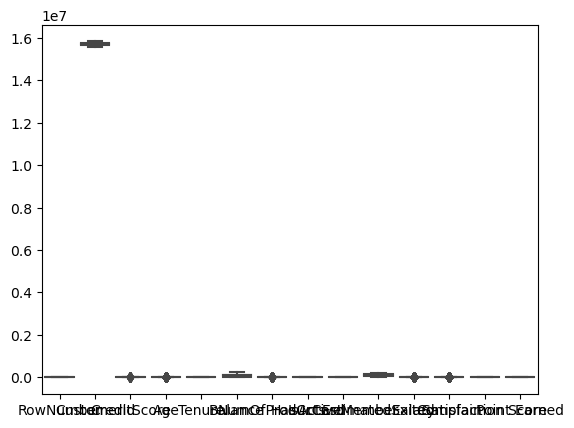

In [10]:
#finding outliers
sns.boxplot(df)

In [11]:
da=df.drop(['RowNumber'], axis=1)

In [12]:
da.shape

(10000, 17)

In [13]:
#replacing the values of 0 and 1 of numerical values as categorical for better understanding

da['Exited']= da['Exited'].map({0:'non_churned', 1: 'churned' })


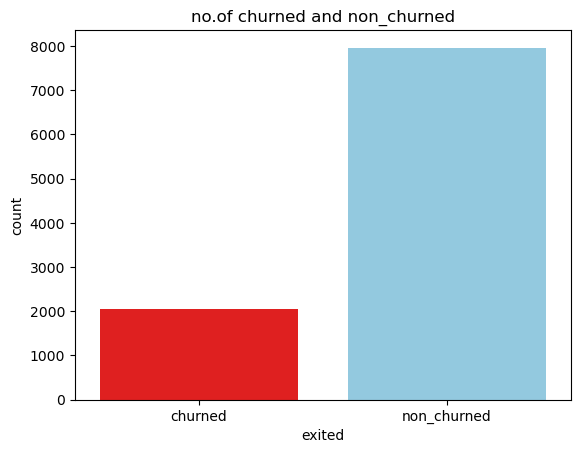

In [14]:
# no.of customers who are exited.

colors = ["red", "skyblue"]

sns.countplot(data=da, x=da['Exited'], palette=colors)
plt.xlabel('exited')
plt.ylabel('count')
plt.title('no.of churned and non_churned')
plt.show()

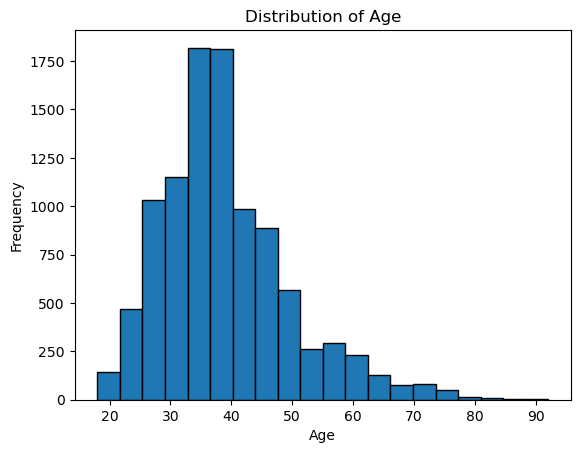

In [15]:
#age distribution

plt.hist(da['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

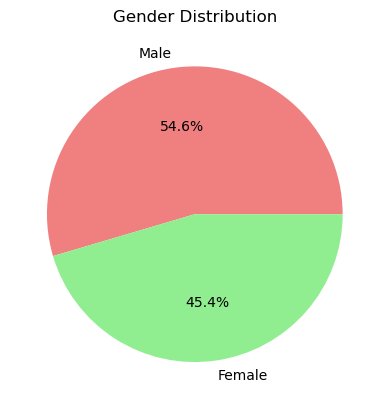

In [16]:
#gender distribution

gender_counts = da['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

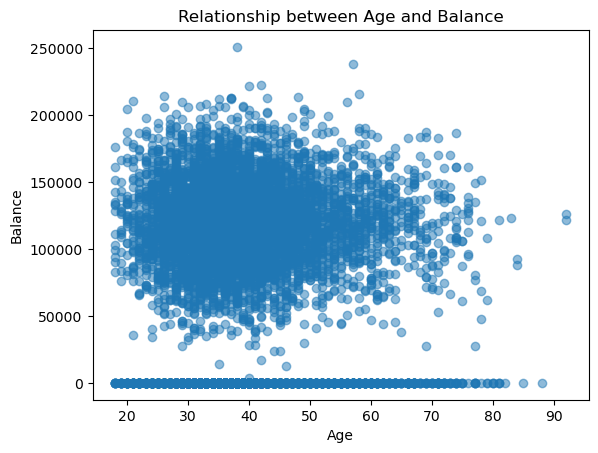

In [17]:
#Relationship between Age and Balance
plt.scatter(da['Age'], da['Balance'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Relationship between Age and Balance')
plt.show()


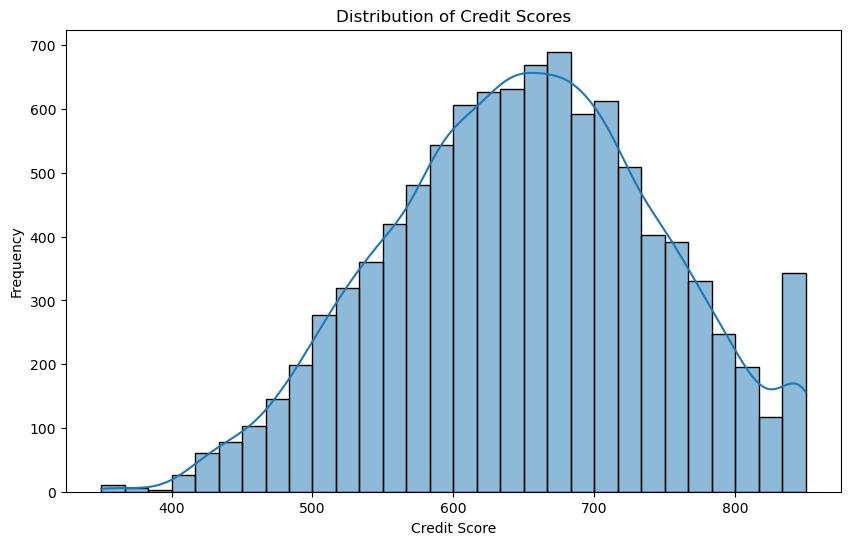

In [18]:
#distribution of credit scores among bank customers

plt.figure(figsize=(10, 6))
sns.histplot(data=da, x='CreditScore', bins=30, kde=True)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.show()


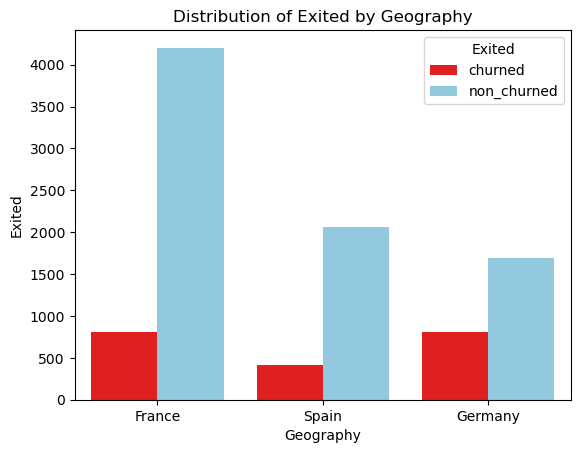

In [19]:
#How does customer churn vary across different geographical regions


sns.countplot(x='Geography', hue='Exited', data=da, palette=colors)
plt.xlabel('Geography')
plt.ylabel('Exited')
plt.title('Distribution of Exited by Geography')
plt.show()


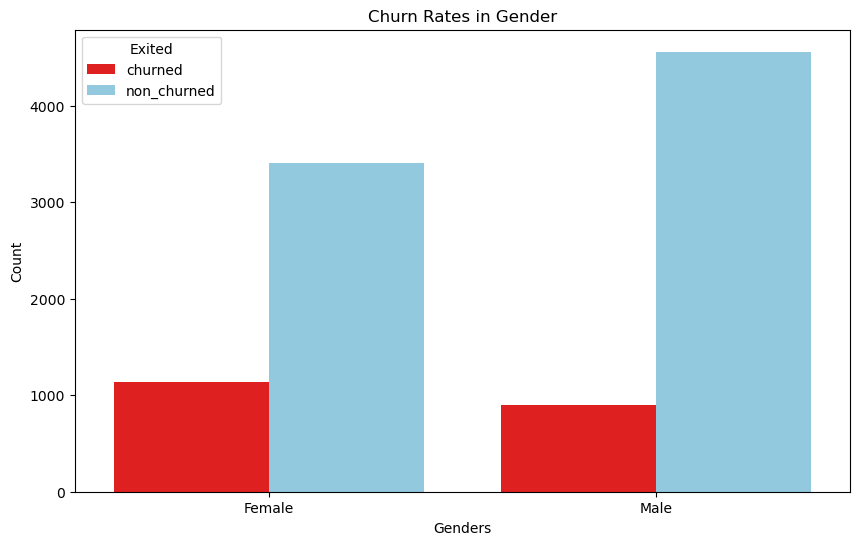

In [20]:
#finding out churn rates between genders

plt.figure(figsize=(10, 6))
sns.countplot(data=da, x='Gender', hue='Exited',palette=colors )
plt.title('Churn Rates in Gender')
plt.xlabel('Genders')
plt.ylabel('Count')
plt.show()

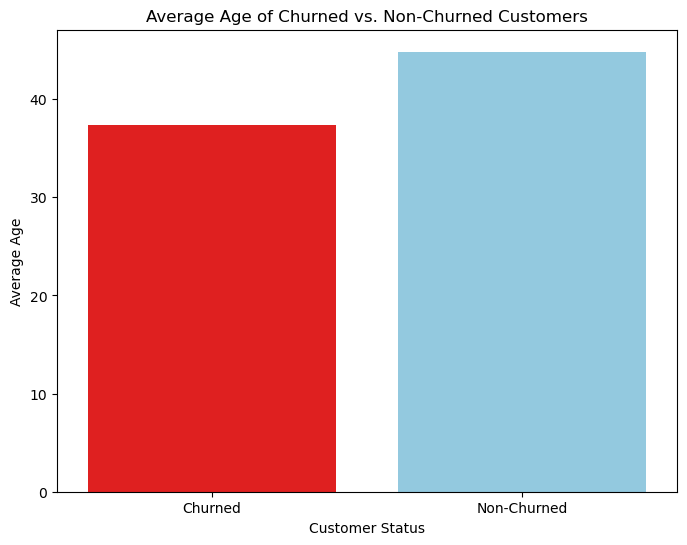

In [21]:
#finding the average age customers who churned compared to those who stayed

# average age 
avg_age_churned = da[da['Exited'] == 'churned']['Age'].mean()
avg_age_non_churned = da[da['Exited'] == 'non_churned']['Age'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churned', 'Non-Churned'], y=[avg_age_non_churned, avg_age_churned], palette=colors)
plt.title('Average Age of Churned vs. Non-Churned Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Age')
plt.show()


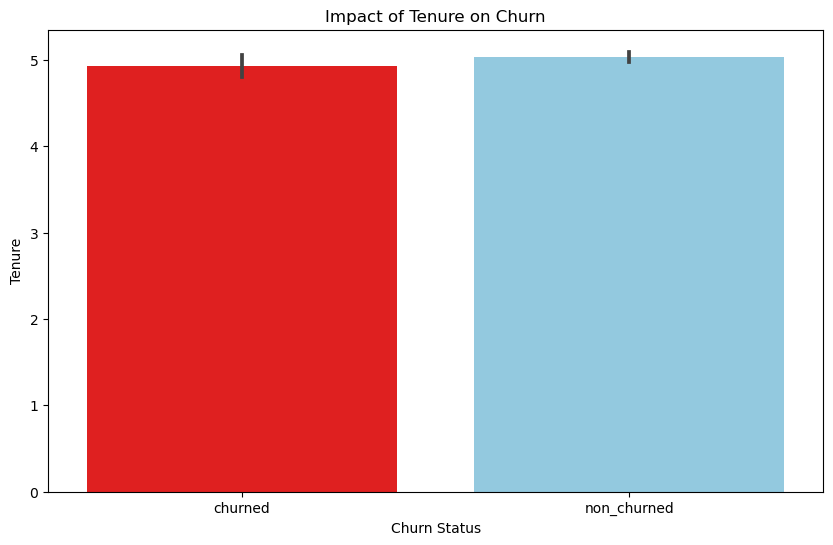

In [22]:
# does tenture lead to churn?

plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='Tenure', data=da,palette=colors)
plt.title('Impact of Tenure on Churn')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

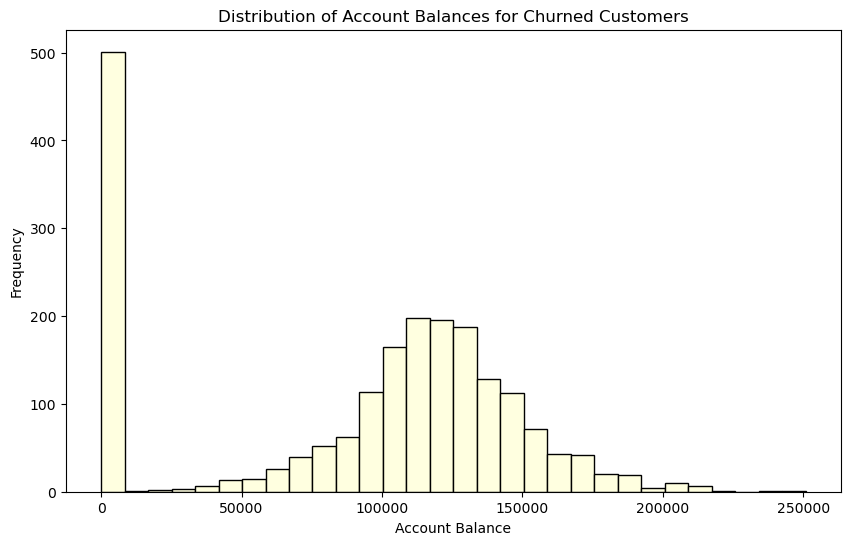

In [23]:
#balance amount among customer who churned

balance_churn=da[da['Exited']== 'churned']

plt.figure(figsize=(10, 6))
plt.hist(balance_churn['Balance'], bins=30, color='lightYellow', edgecolor='black')
plt.title('Distribution of Account Balances for Churned Customers')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()


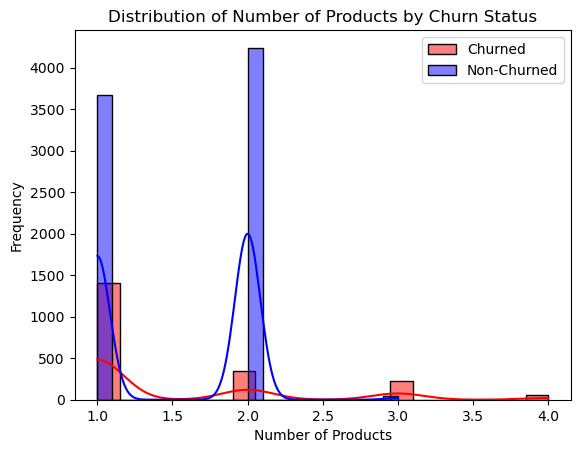

In [24]:
#number of products held by a customer relate to churn?

churned_customers = da[da['Exited'] == 'churned']
non_churned_customers = da[da['Exited'] == 'non_churned']

sns.histplot(churned_customers['NumOfProducts'], color='red', label='Churned', kde=True)
sns.histplot(non_churned_customers['NumOfProducts'], color='blue', label='Non-Churned', kde=True)
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products by Churn Status')
plt.legend()
plt.show()

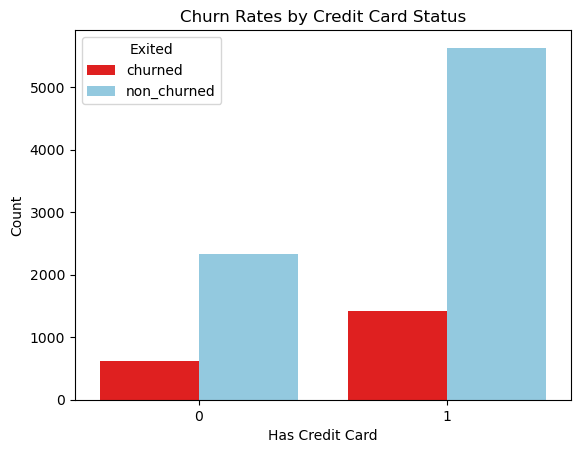

In [25]:
#difference in churn rates between customers with and without credit cards?
sns.countplot(data=da, x='HasCrCard', hue='Exited',palette=colors )
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Churn Rates by Credit Card Status')
plt.show()



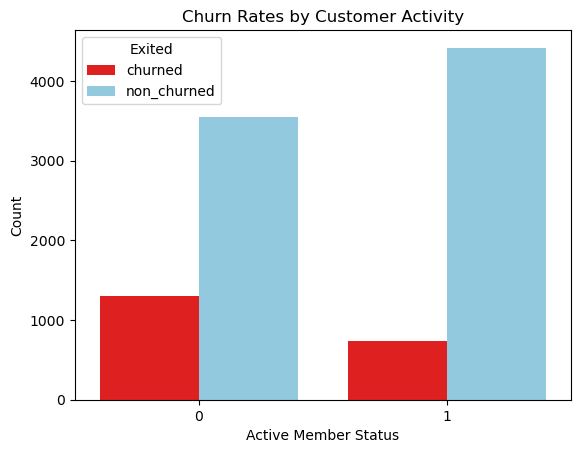

In [26]:
#Does customer activity affect churn rates?

sns.countplot(x='IsActiveMember', hue='Exited', data=da,palette=colors )
plt.xlabel('Active Member Status')
plt.ylabel('Count')
plt.title('Churn Rates by Customer Activity')
plt.show()

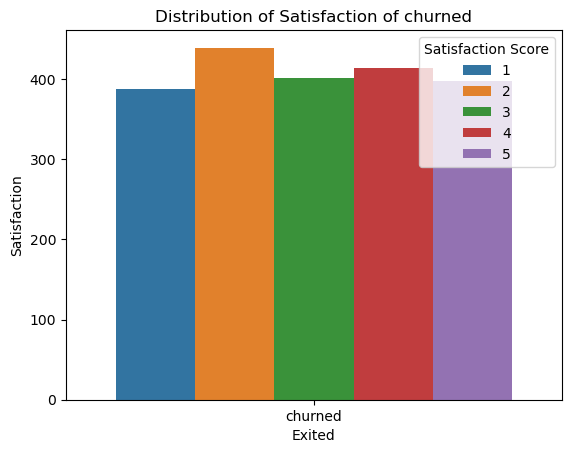

In [27]:
#does satisfaction score lead to exit?

sns.countplot(x='Exited', hue='Satisfaction Score', data=churned_customers)
plt.xlabel('Exited')
plt.ylabel('Satisfaction')
plt.title('Distribution of Satisfaction of churned')
plt.show()

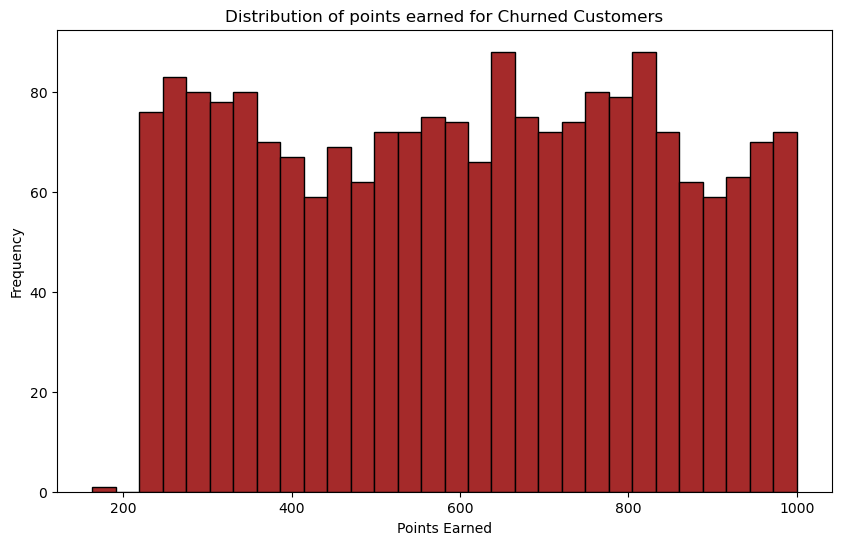

In [28]:
#distribution of points earned

plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Point Earned'], bins=30, color='brown', edgecolor='black')
plt.title('Distribution of points earned for Churned Customers')
plt.xlabel('Points Earned')
plt.ylabel('Frequency')
plt.show()


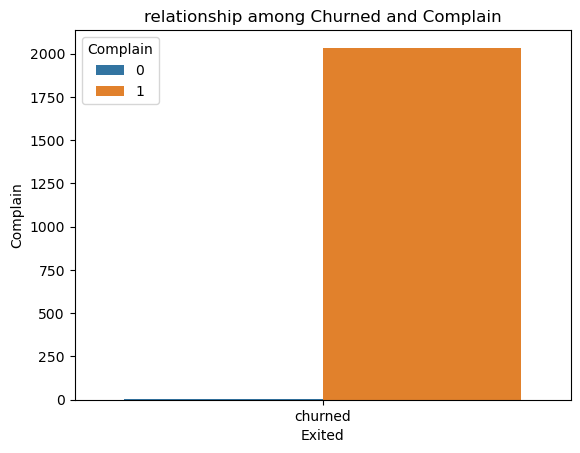

In [29]:
#finding out relationship between complain and exited
#does complain lead to churn?

sns.countplot(x='Exited', hue='Complain', data=churned_customers)
plt.xlabel('Exited')
plt.ylabel('Complain')
plt.title('relationship among Churned and Complain')
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

da.dtypes

for column in da.columns:
    if da[column].dtype == 'object':
        label= LabelEncoder()
        da[column] = label.fit_transform(da[column])
        
da.dtypes   

CustomerId              int64
Surname                 int32
CreditScore             int64
Geography               int32
Gender                  int32
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int32
Complain                int64
Satisfaction Score      int64
Card Type               int32
Point Earned            int64
dtype: object

In [31]:
dif= da.corr()
print(dif["Exited"].sort_values(ascending=False))


Exited                1.000000
IsActiveMember        0.156356
Gender                0.106267
NumOfProducts         0.047611
CreditScore           0.026771
Tenure                0.013656
Card Type             0.010861
Surname               0.010649
HasCrCard             0.006976
CustomerId            0.006203
Satisfaction Score    0.005849
Point Earned          0.004628
EstimatedSalary      -0.012490
Geography            -0.035712
Balance              -0.118577
Age                  -0.285296
Complain             -0.995693
Name: Exited, dtype: float64


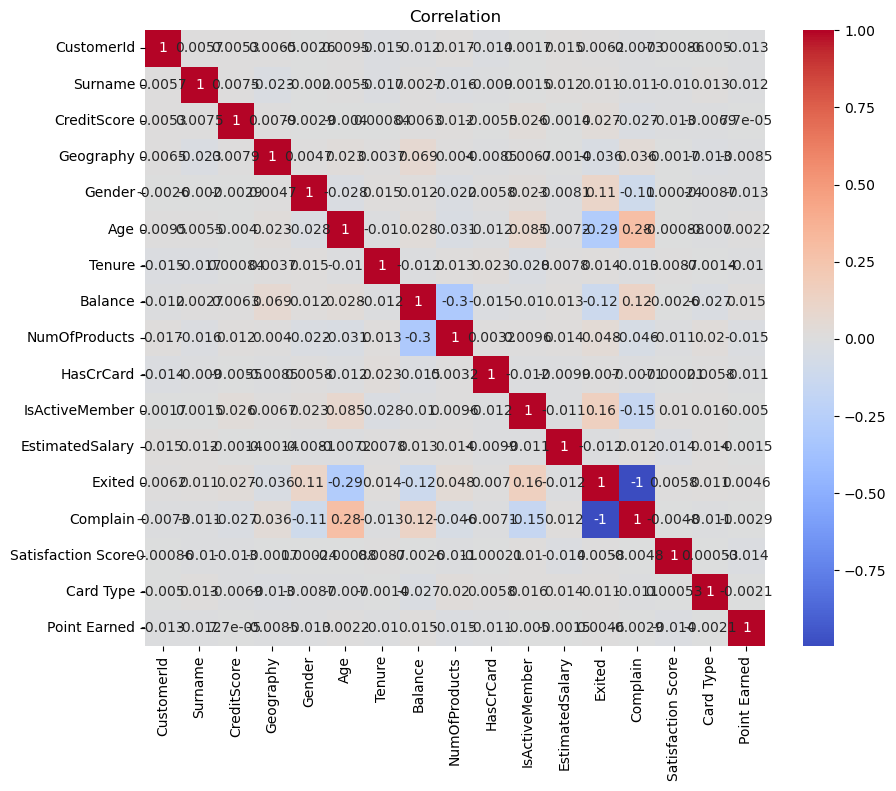

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(da.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()